# EDA with Python and applying Logistic Regression

- For this lecture we will be working with the [Titanic dataset from Kaggle ](https://www.kaggle.com/c/titanic) . This is a very famous data set and very often is a student's first step in machine learning!
- We'll be trying to predict a classification- survival or deceased.
    Let's begin our understanding of implementing Logistic Regression in Python for classification.
- We'll use a \"semi-cleaned\" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.    

In [288]:
import numpy as np    #importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [289]:
train=pd.read_csv("titanic_train.csv") #loading the dataset

In [290]:
train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


## Exploratory Data Analysis


### Step1: Missing data

In [291]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


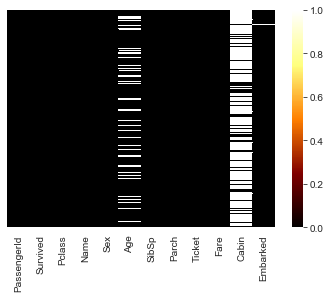

In [292]:
sns.heatmap(train.isnull(),yticklabels=False, cmap="afmhot")  #create a heatmap using seaborn by loding the missing values dataset.

Observation:
- There are only two columns that contain the missing data ("Age" and "Cabin").We can see clearly that, "Cabin" has more missing data than "Age". With this, it's unable to do any basic level operation. We'll drop this later, or change it another feature like "Cabin known:1 or 0"
- Let's visualize the data which is available.

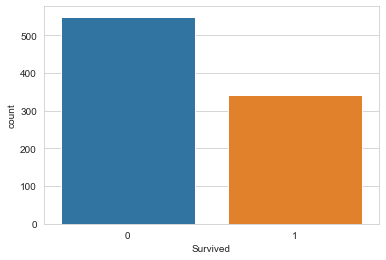

In [293]:
sns.set_style("whitegrid")   #Countplot is used to find range of count of values in a particular column or feature.
sns.countplot(x="Survived", data=train)

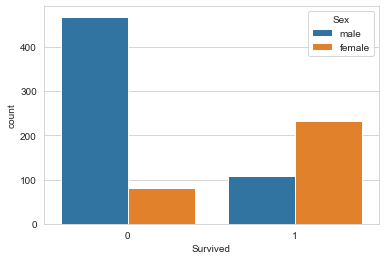

In [294]:
sns.set_style("whitegrid")    #Countplot is used to find range of count of values in a particular column or feature.
sns.countplot(x="Survived", hue="Sex", data=train)

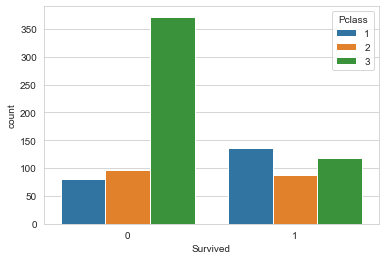

In [295]:
sns.set_style("whitegrid")    #Countplot is used to find range of count of values in a particular column or feature.
sns.countplot(x="Survived", hue="Pclass", data=train)

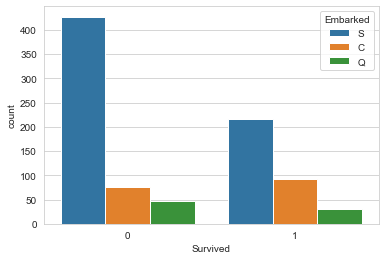

In [296]:
sns.set_style("whitegrid")    #Countplot is used to find range of count of values in a particular column or feature.
sns.countplot(x="Survived", hue="Embarked", data=train)

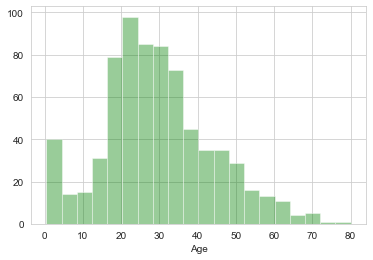

In [297]:
sns.set_style("whitegrid")     #Distplot is used to see distribution of values in a particular column or feature.
sns.distplot(train["Age"].dropna(), kde=False, color="green")

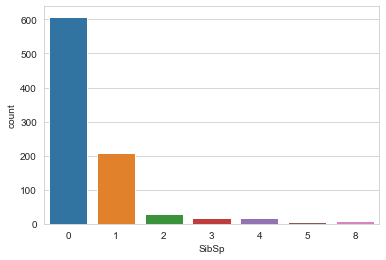

In [298]:
sns.set_style("whitegrid")
sns.countplot(train["SibSp"])  #Countplot is used to find range of count of values in a particular column or feature.

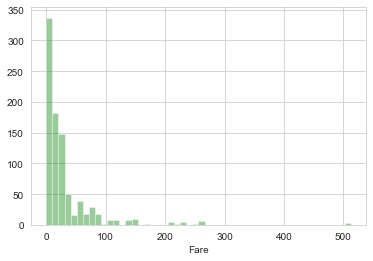

In [299]:
sns.distplot(train["Fare"].dropna(),kde=False, color="green")#Distplot is used to see distribution of values in a particular column or feature.
# or train["Fare"].hist(color="green",bins=40) (this is another syntax for dsiplaying histogram for a feature or column)

## Data Cleaning 
We want to fill in the missing data of age column instead of dropping the entire age data rows.Oen way to do this filling the age by mean age of all passengers(imputation).Check the average age by passenger class.

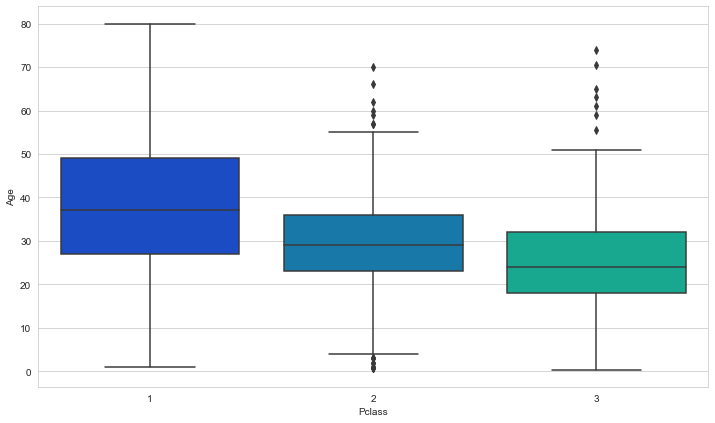

In [300]:
plt.figure(figsize=(12,7)) #To find the average age of the people fall in types of Pclass
sns.boxplot(x="Pclass",y="Age", data=train, palette="winter")

Obeservation:
- we can see that old people tend to be in the class-1 and average age is around 37
- we can also see that Classes (2 and 3) are having young people where class-2 averaging around 29 and class-3 averaging around 24.
- So based on this, we have to fill the missing data with the average age values. 

In [301]:
def impute_age(cols):  #Created a fucntion to fill the avergae age data in the missing values.
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if (Pclass==1):
            return 37
        elif (Pclass==2):
            return 37
        else:
            return 24
    else:
        return Age 
    
    

In [302]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1) #with the apply function we apply it to the columns

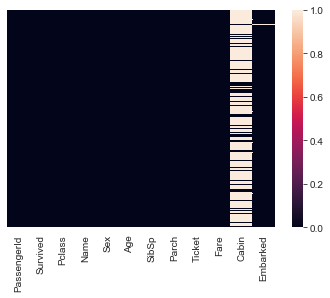

In [303]:
sns.heatmap(data=train.isnull(),yticklabels=False)

In [304]:
train.drop(columns='Cabin',inplace=True) #Droppping the cabin column because lot of feature eng' should be done.

In [305]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [306]:
train.drop(columns="PassengerId",inplace=True) #dropping the unnecessary columns for the operations.

In [307]:
train.drop(columns='Ticket', inplace=True) #dropping the unnecessary columns for the operations.

In [308]:

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### NOTE:
- We dropped the unnecessary columns, Now we have get dummies for the features(or columns) because it helps in getting the quick result after analyzing the data.

In [309]:
pclass=pd.get_dummies(train["Pclass"],drop_first=True) #Getting dummies for Pclass, Sex, Embarked

In [310]:
sex=pd.get_dummies(train["Sex"],drop_first=True)

In [311]:
embarked=pd.get_dummies(train["Embarked"],drop_first=True)

In [312]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [313]:
train.drop(['Name','Sex','Embarked','Pclass'],axis=1, inplace=True)

In [314]:
train.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [315]:
train=pd.concat([train,pclass,sex,embarked],axis=1)

In [316]:
train.head() # With this feature engineering for this dataset is done, we got the pefect and cleaned dataset to build a model.

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


## Building a Logistic Regression model
- There are two types of datasets:
    - Train(Which is we used for feature engineering i.e cleaning, polishing the data)
    - Test (which is another file with which you can play or experiment for building the model and also for not ruining the train data)

- we have to split our data into a training set and test set.


In [398]:
x_train=train.drop("Survived", axis=1)#Dropping the "Survived" column because it is a dependent feature. 


In [399]:
y_train=train["Survived"]#Dependent feature.  


In [400]:
from sklearn.model_selection import train_test_split  #sklearn contains all the necessary libraries for testing and building the model.

In [401]:
X_train, X_test, Y_train, Y_test=train_test_split(x_train, y_train ,test_size=0.30,random_state=101) # inputting our test datasets

## Training and Predicting

In [402]:
from sklearn.linear_model import LogisticRegression

In [419]:
logmodel=LogisticRegression()
logmodel.fit(X_train, Y_train)


C:\Users\mulla\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [420]:
predictions=logmodel.predict(X_test)

In [421]:
from sklearn.metrics import confusion_matrix

In [422]:
cmatrix=confusion_matrix(Y_test,predictions)

In [423]:
cmatrix

array([[137,  17],
       [ 38,  76]], dtype=int64)

In [424]:
from sklearn.metrics import accuracy_score

In [425]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7947761194029851

In [426]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)